# Hash Functions and Cryptographic Hashing

A hash function is an algorithm that maps data to a numerical value (generally with a fixed length). Hash functions are used in many applications. They are very useful for organizing large volumes of data. The main application of hash functions we are going to look at is their use in cryptography.

As we noted, keeping a database of plaintext passwords is a bad idea. The solution is to hash the passwords using a "one-way-function" that is easy to compute, but hard to reverse. 

Shown below are some sample inputs and their corresponding SHA1 outputs (SHA stands for "Secure Hashing Algorithm" - I think we've reached SHA512 so far).
<div>
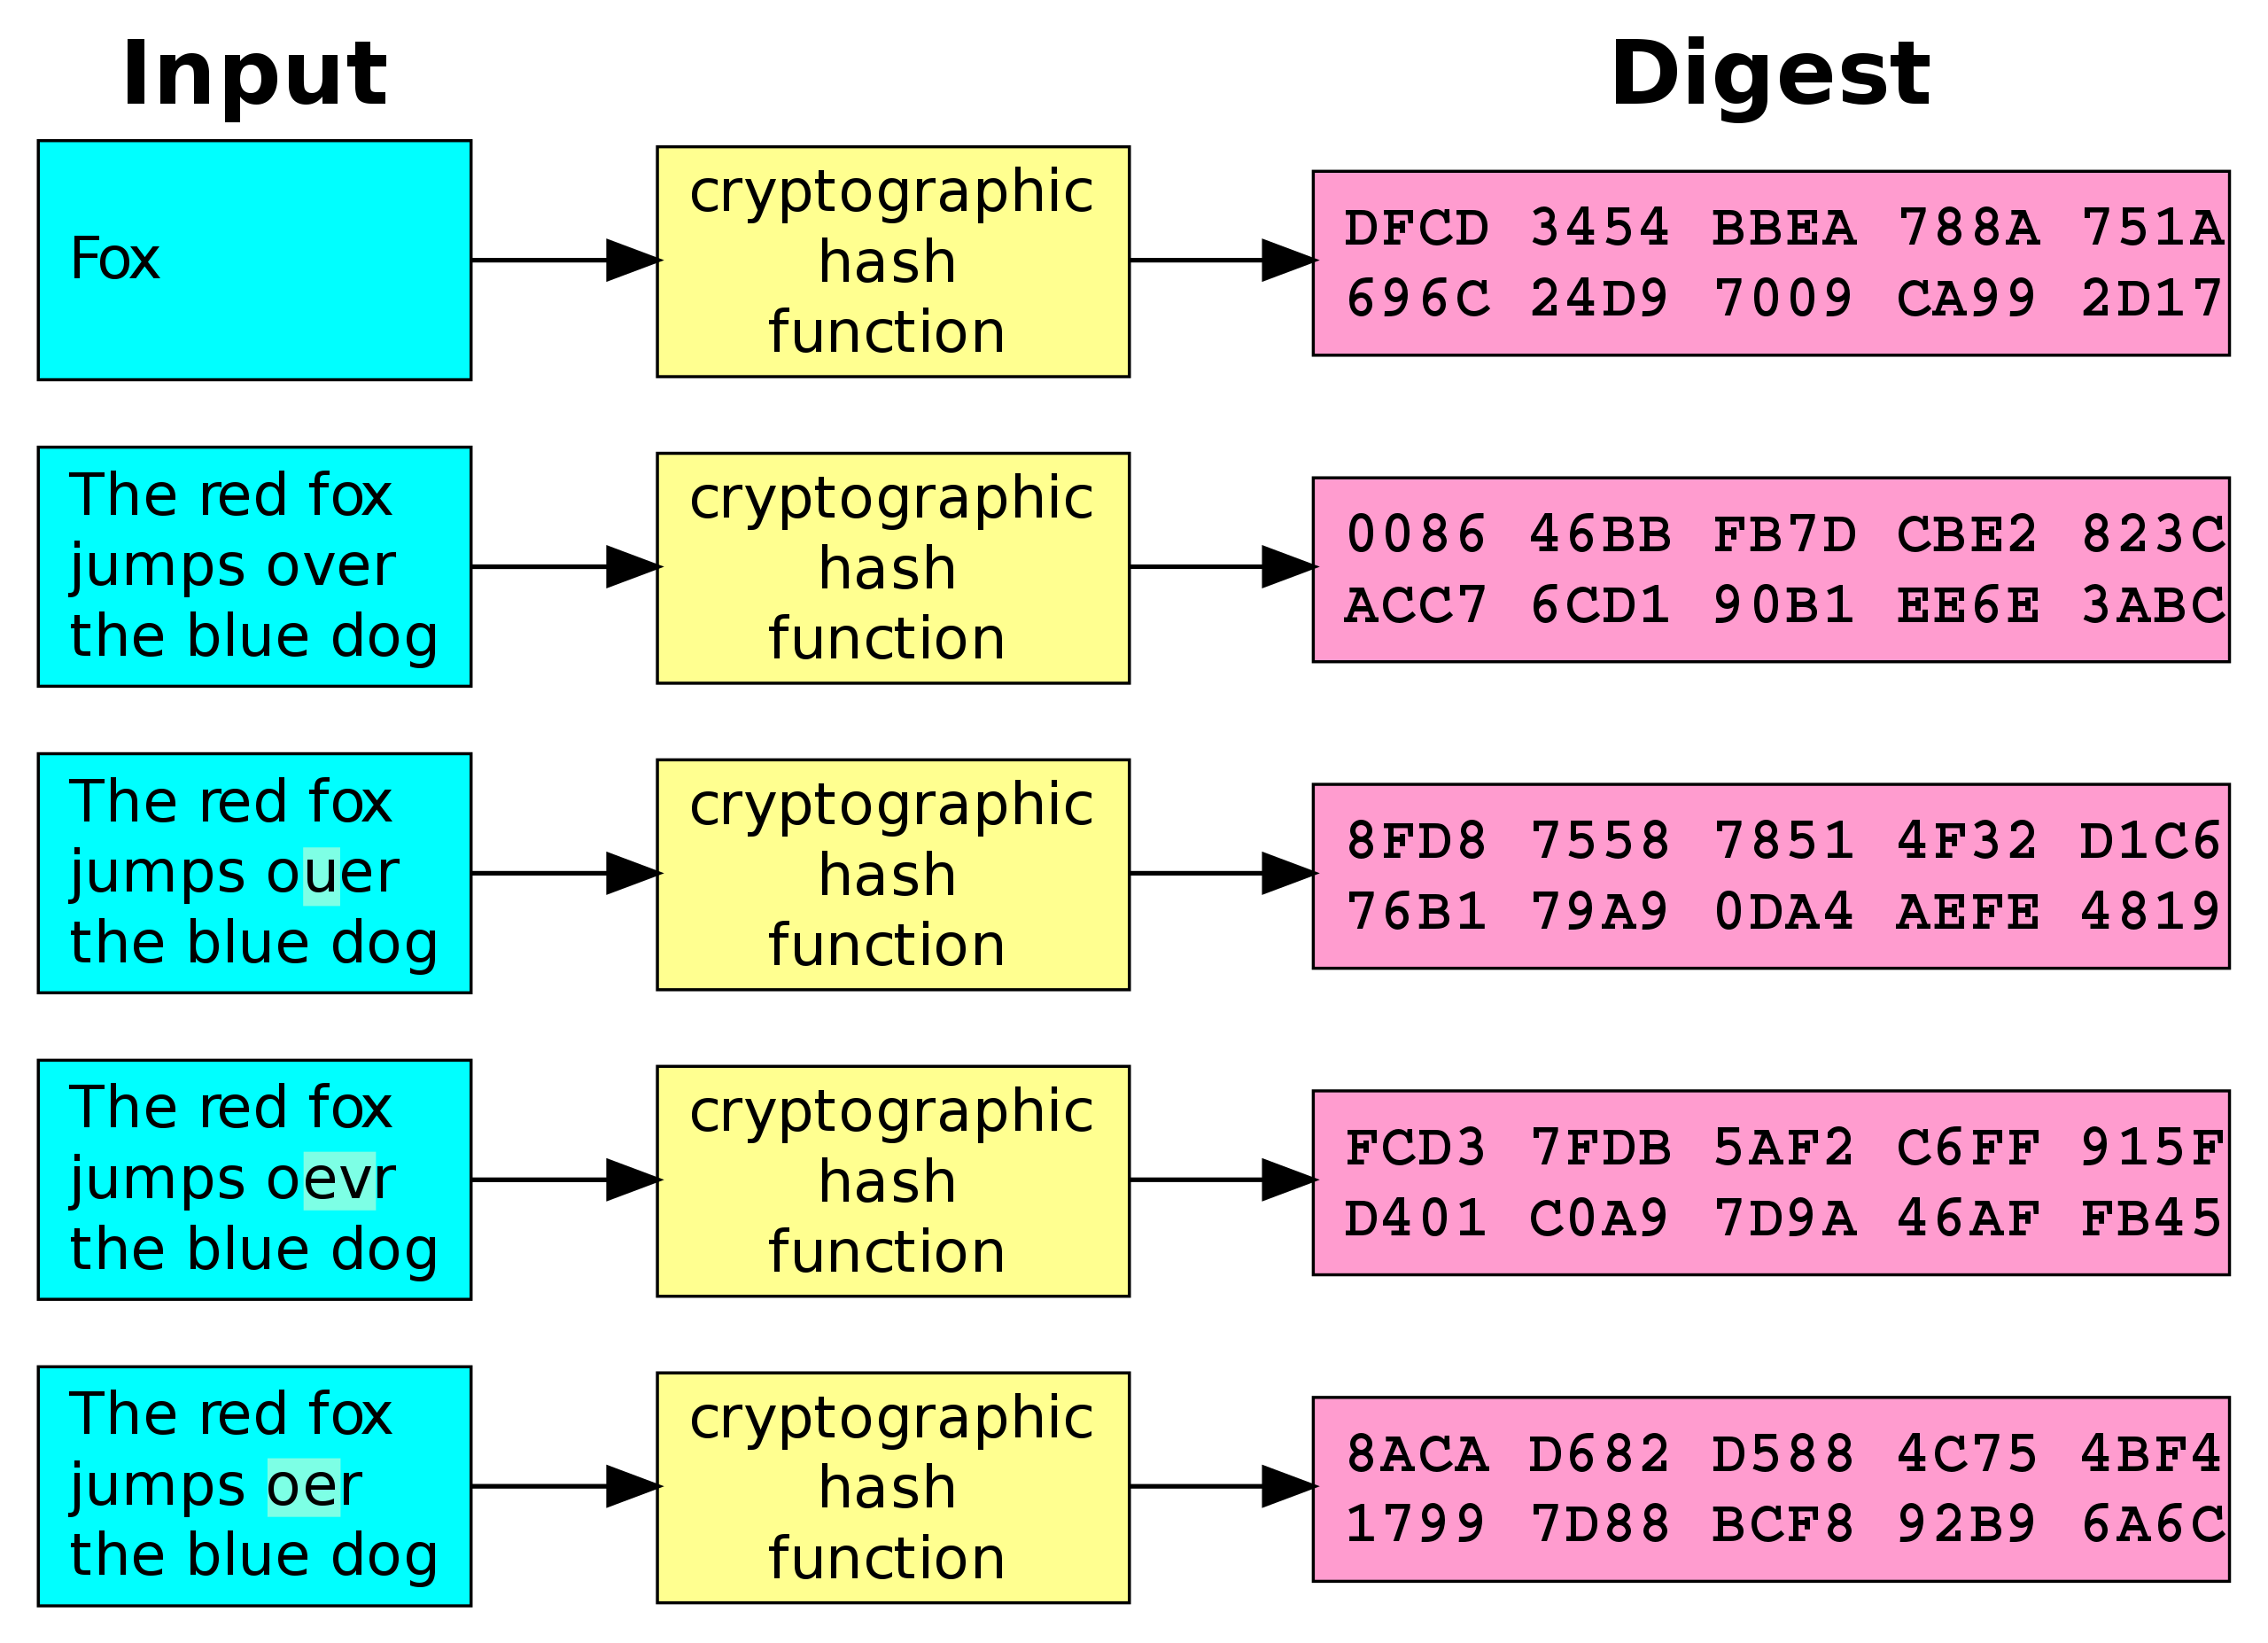
</div>

## What Should a Hashing Algorithm do?

A hashing algorithm should have the following properties:
- quick to compute
- all possible results should be equally likely
- very hard to reverse
- very hard to find two inputs with the same ouptut (these are called *collisions*)
- small changes in the input should result in large changes in the output

Additionaly, most hash  functions are set up in such a way that all output hashes have the same length.



The actual algorithms used in modern cryptography are much too complicated for us to delve into here. We will instead look at some of the ideas that led to modern hashing algorithms and why the historical algorithms are not used anymore.

## Using Hash Functions
Hash functions can be used in databases to quickly organise and search through the different entries. The hash generally provides a unique identifier for each entry and makes searching very efficient. Another use of hash functions is for providing a *checksum* for a downloaded file or application: If you want to be certain that the flie you downloaded has not been tampered with you can compare its hash with the checksum value given on the download page and if they match, then the file you downloaded is the same file that was uploaded to that server.

The main application we will be looking at is the hashing of passwords for storing values in a login  database. Passwords should never be stored in plaintext  form. Databases can be  leaked or hacked, employees may abuse their permissions etc. The way to protect your passwords is by running them through a one-way-function (hash). The result of that hash is then stored in the database.

When a user wants to log in to their account, they send their password to the server. The password is then hashed and  the hash is compared to the database. If the username and hashed password match, then the user is allowed to access their account.

> What are the two main problems with  this type of password storage?

## Salting Hashes
In order to make attacks on password databases harder and in order to make collisions less likely, modern (good) websites will add a **salt** to your password before hashing  it. A salt is a random string of characters that is placed in front of or after your password before it is hashed. The salt ensures that two people with the same password do not have the same hash value in the database. Also, the salting makes it very hard for someone to set up a hash table with all possible passwords.

**Example**

|password|salt|hash input|md5 hashed value|
|--------|----|------|-|
|qwerty|001|qwerty001|CB35A6121CD458E811CA895FE93B9359|
|123456|002|123456002|1AF65A8D875258C0F03FC2C40BB58269|
|password|003|password003|C838AADE3D08F3A27B903CAD39D6FA5B|
|Password|004|Password004|5D59F67F5270937A04373E32435DF6EE|


As you can see this website simply used the order in which people registered as their salt. Is this a good idea? How could such a system be attacked?

Secure systems give each user a long, random sequence as their salt:


|password|salt|hash input|md5 hashed value|
|--------|----|------|-|
|qwerty|GJFXCOAD2H2I|qwertyGJFXCOAD2H2I|E060A807B976C5377535493CEE1F8EC7|
|123456|2II348P2IQ5H|1234562II348P2IQ5H|81906B7FC960BAED4997E8C2B5B760B0|
|password|6VC8ODIX67TU|password6VC8ODIX67TU|2DA5E01DE9DB60B845B52DD7575E381E|
|Password|A4WQKW5GMRLT|PasswordA4WQKW5GMRLT|B85D82A57176F52BC1D429B828A1FAE1|

**Warning** md5 is not secure and should never be used in a password storing application. I used it here for illustration purposes because the hashes are shorter than  the ones generated by SHA-1 or higher.

### A Very Simple Hashing Function

One possibility for a hashing algorithm is to take the numerical value of your data and calculate the remainder when dividing by a prime number. So for example we could define the hash function as 
$$\texttt{hash(data)}\  =\  \texttt{number_from_data}\  \mod\  11$$

The question of how to translate the data into a number is a very standard one in computer science. We can just use the ASCII encoding of each letter and write them one after the other (This is not how it is actually done, but sufficient for our purposes). So 'abc' would become the number '979899' and 'Hello' would be '72101108108111'. After applying our "hash function", we would get the following results:

|input|'number'|'hash'|
|-----|--------|------|
|abc  |979899  |8     |
|Hello|72101108108111|5|

Obviously, this is not a very good hashing algorithm: At the latest after 12 entries there will be collisions.

The code below calculates the hash for a given input. The method for translating text to a number can just be copied if you  need it elsewhere. The fine points of that code are too much for the moment.

In [1]:
def text_to_number(text):
    return int(''.join([str(ord(c)) for c in text]))

h = text_to_number("Your text goes here")


print("Your text as a number: " + str(h))
print("Your text 'hashed': " + str(h % 11))

Your text as a number: 89111117114321161011201163210311110111532104101114101
Your text 'hashed': 3


### Finding Collisions
The code below creates a series of random "words" and calculates their hashes. You can see how easy it is to get collisions with this method.

In [2]:
import random
import string

def random_list_with_hashes(n):
    for i in range(n):
        t = ''.join(random.choices(string.ascii_uppercase, k=6))
        h = text_to_number(t)
        print("text: " + t + " " + "number: " + str(h) + " " + "hash: " + str(h % 11))
        
random_list_with_hashes(12)

text: SPILEJ number: 838073766974 hash: 4
text: LNPQKC number: 767880817567 hash: 6
text: SKJYXW number: 837574898887 hash: 1
text: NTBVDL number: 788466866876 hash: 7
text: AWCFHF number: 658767707270 hash: 2
text: MYBEOP number: 778966697980 hash: 9
text: AHFBVN number: 657270668678 hash: 8
text: GTWFQV number: 718487708186 hash: 6
text: BAJROH number: 666574827972 hash: 9
text: XBHUSR number: 886672858382 hash: 3
text: EQGJNG number: 698171747871 hash: 4
text: KFTZND number: 757084907868 hash: 3


### Hashing with Python
Below is some code that will create md5 and SHA-1 hashes of your input.

In [8]:
import hashlib

string_to_hash = "Please enter your text to hash"

def hash_md5(text):
    return hashlib.md5(text.encode()).hexdigest()

def hash_sha1(text):
    return hashlib.sha1(text.encode()).hexdigest()

print("The input was: " + string_to_hash)
print("The md5 hashed output is: " + hash_md5(string_to_hash))
print("The sha1 hashed output is: " + hash_sha1(string_to_hash))

The input was: Please enter your text to hash: 
The md5 hashed output is: 5fe9b9a36d47e829c5143a9dfb674e78
The sha1 hashed output is: e8854fbba8741533b504250eee91e9e79956fc0b


### See the Exercise Sheet for more on Hash Functions